In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from import_data import get_demand, get_gen, get_mcp, get_vre, read_processed_files
from environment import market_env
from actor_critic import ActorCriticAgent
from utils import plot_learning_curve
import numpy as np

ModuleNotFoundError: No module named 'get_data'

# Get Data

In [ ]:
df_demand, df_demand_scaled, df_vre, df_vre_scaled, df_gen, df_gen_scaled, df_mcp = read_processed_files()

In [40]:
# Example usage
env = market_env(demand=df_demand_scaled, re = df_vre_scaled, prices = df_mcp, eps_length=24, capacity=200, mc=35)

# Assuming you have a gym environment called 'env'
input_size = env.observation_space.shape[0]
n_actions = env.action_space.n
n_games = 1000

agent = ActorCriticAgent(input_size, n_actions)

filename = 'power_plant.png'

figure_file = 'plots/' + filename

best_score = env.reward_range[0]
score_history = []
load_checkpoint = False

/Users/louis.skowronek/miniforge3/envs/bda_env/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [41]:
reward_history = []

if load_checkpoint:
    agent.load_models()

for i in range(n_games):
    observation = env.reset()
    done = False
    score = 0

    while not done:

        action = agent.choose_action(observation)

        observation_next, reward, done, _ = env.step(action)
        score += reward
        if not load_checkpoint:
            agent.update(observation, reward, observation_next, done)
        observation = observation_next

    score_history.append(score)
    avg_score = np.mean(score_history[-100:])

    if avg_score > best_score:
        best_score = avg_score
        if not load_checkpoint:
            agent.save_models()

    print('episode ', i, 'score %.1f' % score, 'avg_score %.1f' % avg_score)

... saving models ...
episode  0 score 69.4 avg_score 69.4
... saving models ...
episode  1 score 268.9 avg_score 169.1
... saving models ...
episode  2 score 241.0 avg_score 193.1
episode  3 score 7.6 avg_score 146.7
episode  4 score 16.0 avg_score 120.6
episode  5 score 8.1 avg_score 101.8
episode  6 score -7.5 avg_score 86.2
episode  7 score 138.3 avg_score 92.7
episode  8 score 46.9 avg_score 87.6
episode  9 score -13.7 avg_score 77.5
episode  10 score 24.4 avg_score 72.7
episode  11 score 11.5 avg_score 67.6
episode  12 score 179.5 avg_score 76.2
episode  13 score 226.8 avg_score 86.9
episode  14 score 151.0 avg_score 91.2
episode  15 score 6.5 avg_score 85.9
episode  16 score 53.2 avg_score 84.0
episode  17 score 114.4 avg_score 85.7
episode  18 score 8.0 avg_score 81.6
episode  19 score 0.0 avg_score 77.5
episode  20 score 100.3 avg_score 78.6
episode  21 score 8.3 avg_score 75.4
episode  22 score 16.1 avg_score 72.8
episode  23 score 141.8 avg_score 75.7
episode  24 score 21.0 

KeyboardInterrupt: 

In [130]:
env.results_ep.describe()

,reward,market price,bid price,bid volume
count,3216.000000,3216.000000,3216.000000,3216.0
mean,8.854197,110.486720,28.028296,200.0
std,2.762287,44.607165,1.604661,0.0
min,-7.224000,-8.820000,28.000000,200.0
25%,9.302400,89.870000,28.000000,200.0
50%,9.623300,110.565000,28.000000,200.0
75%,9.926650,137.345000,28.000000,200.0
max,10.758800,270.220000,119.000000,200.0


<Axes: >

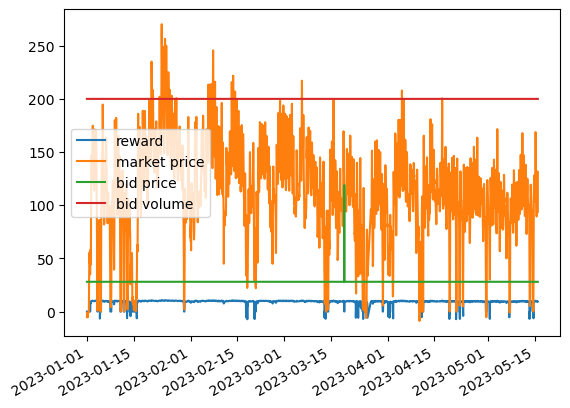

In [132]:
env.results_ep.plot()

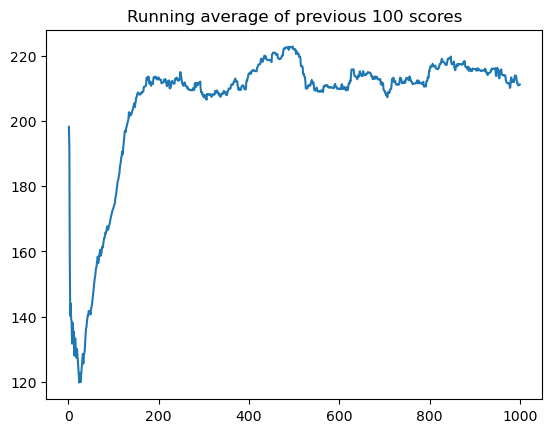

In [140]:
x = [i + 1 for i in range(len(score_history))]
plot_learning_curve(x, score_history)